In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset into dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#check missing values
print(loan.isnull().sum())

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# check for duplicates
sum(loan.duplicated())

0

# Create a subset columns as there are too any features that are not needed

In [6]:
columns = ['LoanNumber','LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)','Occupation','Recommendations']
loan_copy = loan[columns]

In [7]:
loan_copy.sample(5)

,LoanNumber,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),Occupation,Recommendations
47911,96651,Current,0.18852,Employed,5333.333333,True,0.21,18000,60,B,Teacher,0
104843,19697,Completed,0.08870,Full-time,5000.000000,True,0.19,1000,36,NaN,Military Enlisted,0
36307,131024,Current,0.20040,Employed,3182.333333,True,0.35,10000,60,C,Other,0
34649,41877,Completed,0.28320,Full-time,5416.666667,True,0.57,4500,36,D,Military Officer,1
89085,127023,Current,0.21648,Employed,4250.000000,True,0.52,15000,36,C,Professional,0


In [8]:
print(loan_copy.shape)
loan_copy.info()

(113937, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanNumber             113937 non-null  int64  
 1   LoanStatus             113937 non-null  object 
 2   BorrowerAPR            113912 non-null  float64
 3   EmploymentStatus       111682 non-null  object 
 4   StatedMonthlyIncome    113937 non-null  float64
 5   IncomeVerifiable       113937 non-null  bool   
 6   DebtToIncomeRatio      105383 non-null  float64
 7   LoanOriginalAmount     113937 non-null  int64  
 8   Term                   113937 non-null  int64  
 9   ProsperRating (Alpha)  84853 non-null   object 
 10  Occupation             110349 non-null  object 
 11  Recommendations        113937 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 9.7+ MB


In [9]:
loan_copy[['ProsperRating (Alpha)']].isnull().sum()

ProsperRating (Alpha)    29084
dtype: int64

In [10]:
# check for unique ratings
loan_copy['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [11]:
# drop the missing values in ProsperRating (Alpha) column
loan_copy.dropna(subset= ['ProsperRating (Alpha)'], inplace = True)

In [12]:
# check for unique ratings
loan_copy['ProsperRating (Alpha)'].value_counts().sort_values(ascending = False)

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [13]:
#check statistical values
loan_copy.describe()

,LoanNumber,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount,Term,Recommendations
count,84853.000000,84853.000000,8.485300e+04,77557.000000,84853.000000,84853.000000,84853.000000
mean,86591.561595,0.226658,5.931175e+03,0.258752,9083.440515,42.486135,0.017560
std,28888.666191,0.079916,8.239944e+03,0.318326,6287.860058,11.640346,0.187963
min,38045.000000,0.045830,0.000000e+00,0.000000,1000.000000,12.000000,0.000000
25%,60950.000000,0.163280,3.434000e+03,0.150000,4000.000000,36.000000,0.000000
50%,87789.000000,0.219450,5.000000e+03,0.220000,7500.000000,36.000000,0.000000
75%,109096.000000,0.292540,7.083333e+03,0.320000,13500.000000,60.000000,0.000000
max,136486.000000,0.423950,1.750003e+06,10.010000,35000.000000,60.000000,19.000000


# What is the structure of your dataset?
This dataset contains 113,937 loans with 81 columns

# What is/are the main feature(s) of interest in your dataset?
I am most interested in predicting the borrower's APR(annual cost of a loan to a borrower, measured in %). I am looking for features that are relevant to my analysis

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect the laon amount to have an effect on borrower's APR, but would also look at the relationship with other features such as 'LoanNumber','LoanStatus','EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)','Occupation','Recommendations'] 

# Univariate

1. Check the distribution of Borrower's APR(Interest Rate) in the prosper loan data

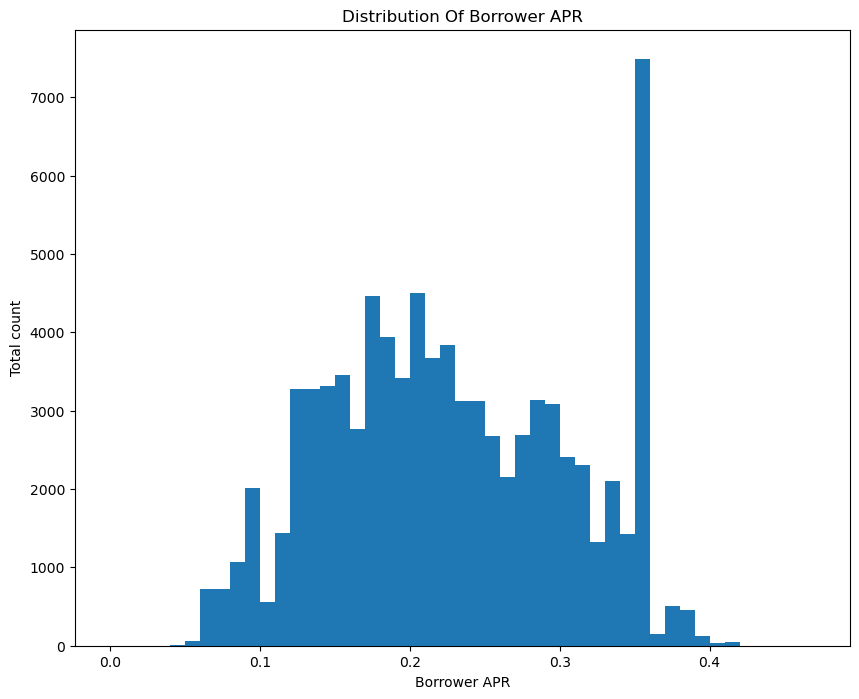

In [27]:
# define a function to plot distribution of borrower's APR
def plot_x(data, x, x_label, y_label, title):
    plt.figure(figsize=[10,8])
    #creating a bin
    bins = np.arange(0, loan_copy.BorrowerAPR.max()+ 0.05, 0.01)
    plt.hist(data = loan_copy, x = x, bins = bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

plot_x(data='loan_copy', x ='BorrowerAPR', x_label='Borrower APR',  y_label='Total count',
          title=('Distribution Of Borrower APR'))

#source code:https://review.udacity.com/#!/reviews/3960816

There is obvious multimodal distribution obderved at 0.1. 0.2. 0.3 and a sharp peak at about 0.37 followed by a sharp decline. 
There seems to be no loan awarded at a rate greater than 0.42. 

In [15]:
APR_outliers = loan_copy[loan_copy['BorrowerAPR'] > 0.42]
APR_outliers

,LoanNumber,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),Occupation,Recommendations
105889,45271,Chargedoff,0.42395,Employed,2250.0,True,0.08,1000,36,HR,Administrative Assistant,0


Four out of Seven(outlier) defaulted in the loan statues, Two were charged-off and One completed.

# 2. what is the distribution of loan amounts given

In [64]:
# 10 topmost amount given
loan_copy['LoanOriginalAmount'].value_counts()[0:10]

4000     13233
15000    11460
10000     9816
2000      4591
5000      4224
3000      3451
20000     2928
25000     2788
7000      2292
7500      2177
Name: LoanOriginalAmount, dtype: int64

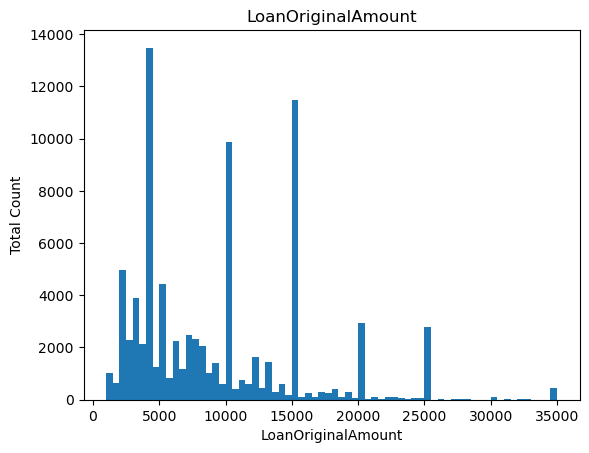

In [65]:
# histogram distribution of amount of loans given
fig = (12,8)
bins = np.arange(1000, loan_copy['LoanOriginalAmount'].max() + 500, 500)
plt.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Total Count')
plt.title('LoanOriginalAmount');


#source code: shorturl.at/hjOQ3

From the hist distribution, it is observed that the highest distributed loan amounts were 4000, 15000, 10000, 5000 accordingly. The minimum amout distributed ia 1000 

# 3. what is the effect of occupation on loan

In [66]:
# set dtype of 'EmploymentStatus' to category
employ_order = loan_copy['Occupation'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_copy['Occupation'] = loan_copy['Occupation'].astype(ordered_var)

In [67]:
loan_copy['Occupation'].unique()

['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail', 'Laborer', ..., 'Student - College Junior', 'Tradesman - Plumber', 'Student - College Sophomore', 'Student - Community College', 'Student - Technical School']
Length: 68
Categories (67, object): ['Other' < 'Professional' < 'Executive' < 'Computer Programmer' ... 'Student - College Freshman' < 'Student - College Sophomore' < 'Student - Community College' < 'Student - Technical School']

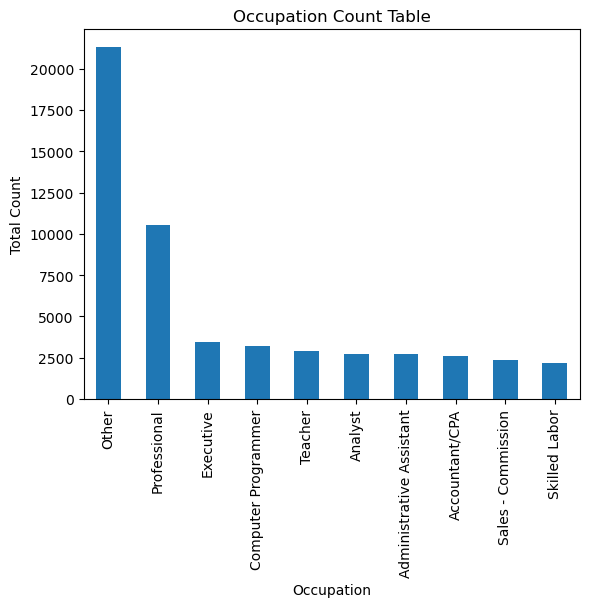

In [68]:
# Top 10 occupational distribution
fig = 8,5
job_loan = loan_copy['Occupation'].value_counts()[0:10].plot(kind='bar')
plt.title('Occupation Count Table')
plt.xlabel('Occupation')
plt.ylabel('Total Count');


There are 67 known distinct occupations that accessed loan from prosper and majority of others(unknown occcupation) were given followed by professionals.

# what is the durations of the loans

In [69]:
# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_copy['Term'] = loan_copy['Term'].astype(ordered_var);

In [70]:
sorted_count = loan_copy['Term'].value_counts()
sorted_count

36    58695
60    24545
12     1613
Name: Term, dtype: int64

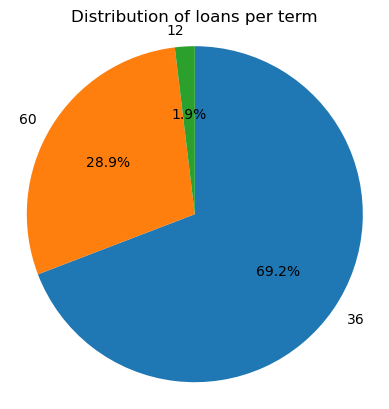

In [71]:
plt.pie(sorted_count, labels = sorted_count.index, startangle = 90, counterclock = False, autopct='%.1f%%');
plt.axis('square')
plt.title('Distribution of loans per term');

 The above chart shows the durations of loans given by prosperLoan. 77% were given at 36 months duration, 21.5% at 60 months and 1.4% at 36% duration.

# 5. what is the employment of people given loan to

In [72]:
 # change dtype of 'EmploymentStatus' to category
employ_order = loan_copy['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_copy['EmploymentStatus'] = loan_copy['EmploymentStatus'].astype(ordered_var)


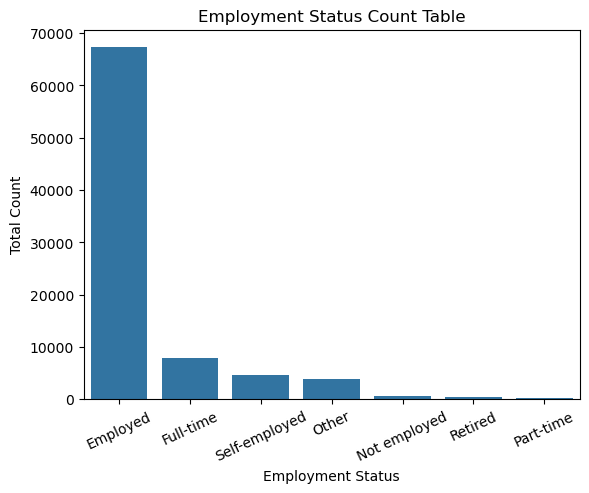

In [73]:
base_color = sns.color_palette()[0]

# plot the data
sns.countplot(data = loan_copy, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 25)
plt.title('Employment Status Count Table')
plt.xlabel('Employment Status')
plt.ylabel('Total Count')
plt.grid(False);

The bar chart indicates that a greater number of borrowers are employed and most of them are full time employees and self employed. The 'not employed' or retired make up a small portion of the overall loans and some borrower's employement status weren't recorded hence the 'not avalaible' category.

# 6. What are the rating category counts in the loan dataset

In [74]:
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_copy['ProsperRating (Alpha)'] = loan_copy['ProsperRating (Alpha)'].astype(ordered_var)
loan_copy.info()

#source code: shorturl.at/hjOQ3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   LoanNumber             84853 non-null  int64   
 1   LoanStatus             84853 non-null  object  
 2   BorrowerAPR            84853 non-null  float64 
 3   EmploymentStatus       84853 non-null  category
 4   StatedMonthlyIncome    84853 non-null  float64 
 5   IncomeVerifiable       84853 non-null  bool    
 6   DebtToIncomeRatio      77557 non-null  float64 
 7   LoanOriginalAmount     84853 non-null  int64   
 8   Term                   84853 non-null  category
 9   ProsperRating (Alpha)  84853 non-null  category
 10  Occupation             83520 non-null  category
 11  Recommendations        84853 non-null  int64   
dtypes: bool(1), category(4), float64(3), int64(3), object(1)
memory usage: 5.6+ MB


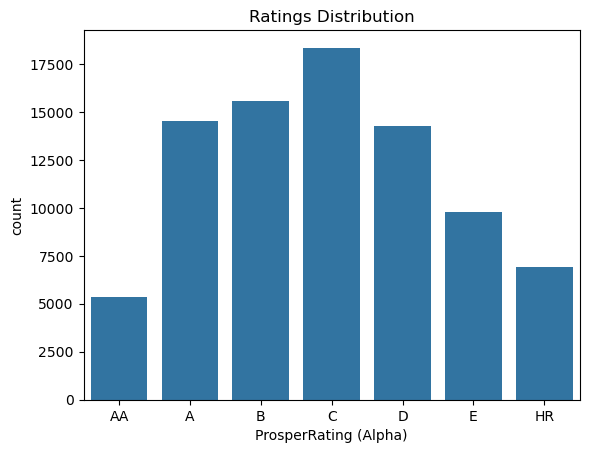

In [75]:
# set the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan_copy, x = 'ProsperRating (Alpha)', color = base_color)
plt.title('Ratings Distribution');

The Prosper loan dataset has a unique rating scale system and the rating counts from highest to lowest appear as follows C,B,A,D,E,HR and AA. The highest borrowers fall under C ratings followed by B and then A with the least count being AA.

# 7. check for the distribution of debt to income ratio

In [76]:
loan_copy['DebtToIncomeRatio'].isnull().sum()


7296

In [77]:
loan_copy['DebtToIncomeRatio'].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

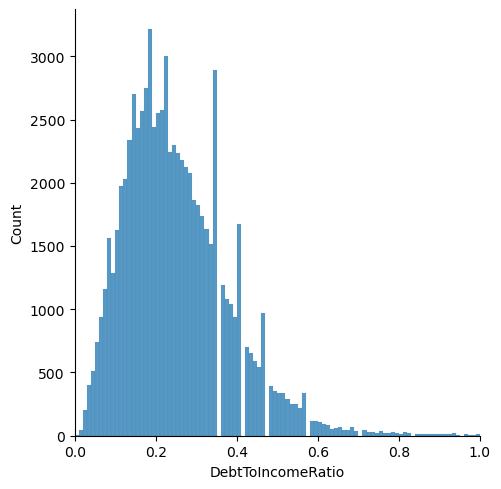

In [78]:
# examine the distribution where DebtToIncomeRatio <1
bin_edges = np.arange(0, loan_copy.DebtToIncomeRatio.max() + 0.01, 0.01)
sns.displot(loan_copy.DebtToIncomeRatio, kde = False, bins = bin_edges)
plt.xlim((0, 1));

#source code: shorturl.at/hjOQ3

This gave a right skewed graph which implied a decrease to debt as income increases. There is observeable sharp decrease from 0.4 upwards. 

# 8. what is the distribution of loan staus

In [79]:
loan_copy['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [80]:
# There are many Past Due loan status depending on number of days the loan has been due
#  group all values containing "Past Due " in the column and replace with "Past Due"

loan_copy.loc[loan_copy['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
loan_copy[loan_copy['LoanStatus']=="Past Due"]

,LoanNumber,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),Occupation,Recommendations
12,125045,Past Due,0.17969,Employed,2416.666667,True,0.18,4000,36,B,Sales - Retail,0
82,95823,Past Due,0.33286,Employed,4166.666667,True,0.12,4000,36,E,Other,0
139,62579,Past Due,0.33973,Other,1835.416667,True,0.41,2500,36,E,Other,0
508,51507,Past Due,0.30532,Employed,2099.000000,True,0.13,4500,36,D,Nurse's Aide,0
597,70607,Past Due,0.17849,Employed,5533.333333,True,0.30,23500,60,A,Retail Management,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113697,58292,Past Due,0.28728,Employed,7583.333333,True,0.28,4000,36,D,Professional,0
113700,76443,Past Due,0.27285,Employed,14000.000000,True,0.22,12500,36,D,Executive,0
113748,93516,Past Due,0.31790,Other,5445.000000,True,0.10,4000,36,E,Other,0
113769,97705,Past Due,0.31790,Employed,6333.333333,True,0.20,2600,36,E,Analyst,0


In [81]:
# change dtype of 'LoanStatus' to category
loanstatus_order = loan_copy['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
loan_copy['LoanStatus'] = loan_copy['LoanStatus'].astype(ordered_var)

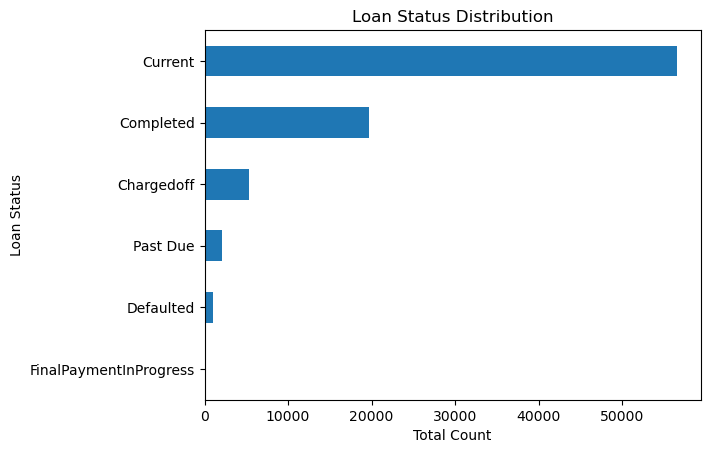

In [82]:
# confirm the change
loanstatus_ordered= loan_copy.LoanStatus.value_counts().sort_values(ascending = True)

figsize = (8, 5)
loanstatus_ordered.plot(kind = 'barh', grid = False)
plt.ylabel('Loan Status')
plt.xlabel('Total Count')
plt.title('Loan Status Distribution');

High number of persons were meeting up with their repayment schedules as the graph shows that majority are current and that a great number of persons have completed their loan. Few person defaulted and a significant number of persons are Past Due payment

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrower APR is the main variable that I am interested in. From the plot, a multimodal distribution is observed, with a peak at 0.2 and a lesser one at 0.1. Then a downward trend with a peak at 0.3 and a sharp spike at 0.35. There seems to be loans barely awarded at a rate greater than 0.42. I regarded rates above 4.2 as outliers, there are no noticeable unusual points.

I peformed a couple transformations: 
First, I converted a couple coulmns into 'category' datetype.
Then i droppes the missing values in the ProsperRating columns.
I also grouped the different values in the "LoanStatus" that contains the string "Past Due " into a single value to make it easier to read.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Loan Original Amount: From the hist distribution, it is observed that the highest distributed loan amounts were 4000, 15000, 10000, 5000 accordingly. The minimum amout distributed is 1000 and the maximum is 35000.


Occupation: There are 67 known distinct occupations that accessed loan from prosper and majority that were given were those with unknown occcupation regarded as Others followed by professionals.

Term: The above chart shows the durations of loans given by prosperLoan. 77% were given at 36 months duration, 21.5% at 60 months and 1.4% at 36% duration.

Employment Status: The bar chart indicates that a greater number of borrowers are employed and most of them are full time employees and self employed. The 'not employed' or retired make up a small portion of the overall loans and some borrower's employement status weren't recorded hence the 'not avalaible' category.

ProsperRating: The Prosper loan dataset has a unique rating scale system and the rating counts from highest to lowest appear as follows C,B,A,D,E,HR and AA. The highest borrowers fall under C ratings followed by B and then A  and D with the least count being AA.


Debt_to_income Ratio: This gave a right skewed graph which implied a decrease to debt as income increases. There is observeable sharp decrease from 0.4 upwards. There are 799 more entries where the ratio was greater than one but a right skwed graph was still produced.

Loan Status: High number of persons were meeting up with their repayment schedules as the graph shows that majority are current and that a great number of persons have completed their loan. Few person defaulted and a significant number of persons are Past Due payment


# Bivariant Exploration

# 9. Check for the relationship  between Borrower's APR and Loan original amount

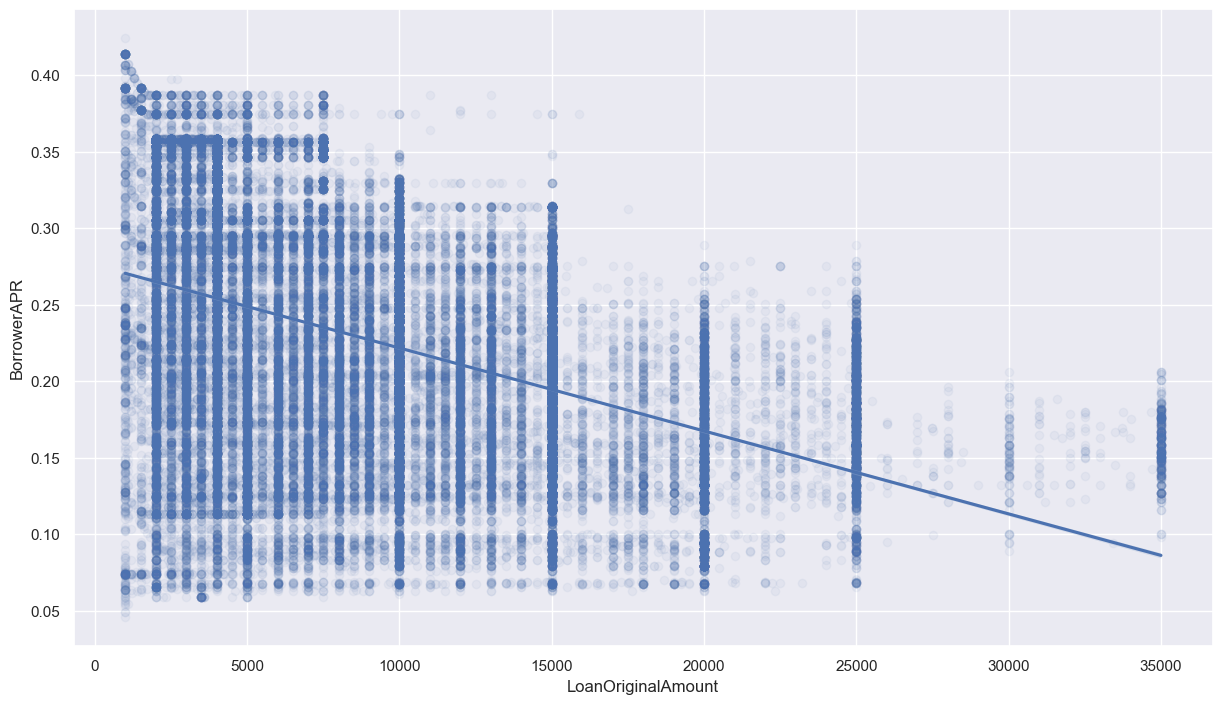

In [32]:
# Scatter plot


sns.set(rc = {'figure.figsize':(14.70,8.27)})
sns.regplot(data = loan_copy, x = 'LoanOriginalAmount', y = 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

The scatter plot indicate a negative correlation between Borrower's APR and Loan Original amount. This implies an decrease in Borrower's APr(Interest rate) as loan amount increases.

# 10. Relationship between Loan Status and Loan Original Amount given

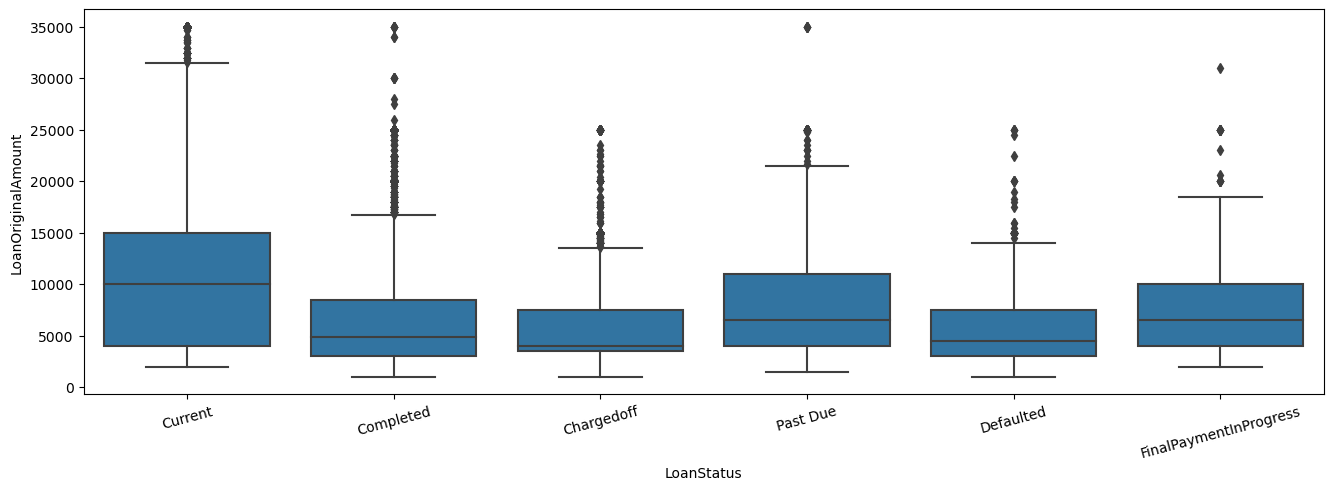

In [84]:
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

#Let's return the axes object
ax1 = sns.boxplot(data=loan_copy, x='LoanStatus', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);


#source code: shorturl.at/hjOQ3

For the current loan status, the median amount is 10000, the maximum is 15000, the minimum is about 4000-5000. very few current amount falls in the range of 32000 and above.

# 11. LoanStatus' variable to the other categorical variables

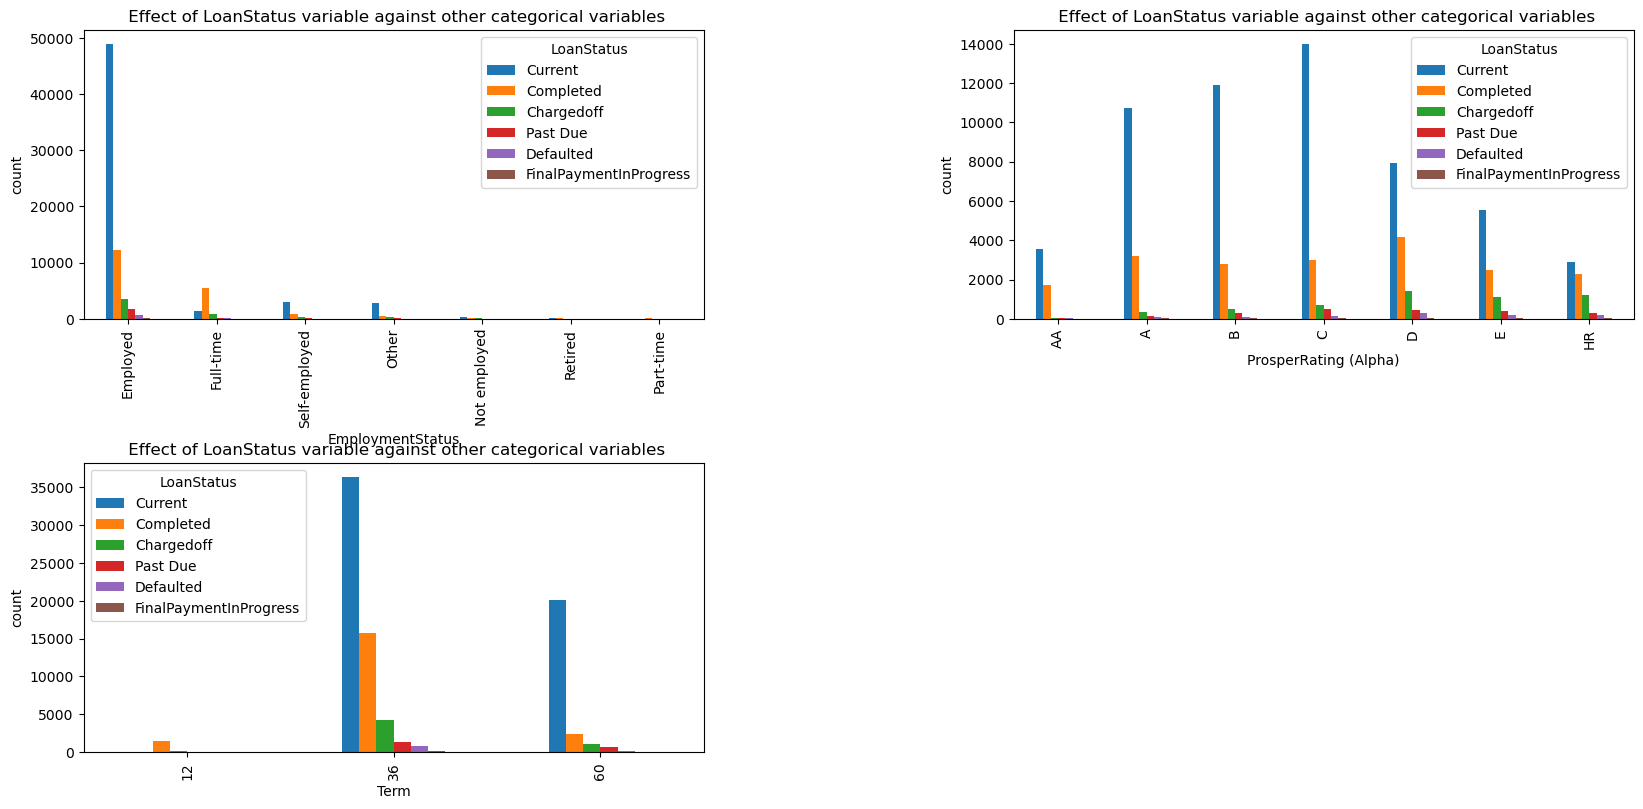

In [85]:
#creating a fuction that plots the categorical variables
# create list of the variables
cat_var = ['EmploymentStatus', 'ProsperRating (Alpha)', 'Term']

fig = plt.figure(figsize=(20,15))
for i, var in enumerate(cat_var):
    ax = fig.add_subplot(3, 2, i+1)
    loan_copy.groupby([var, 'LoanStatus'])[var].count().unstack('LoanStatus').plot(ax=ax, kind='bar', stacked=False, title= ' Effect of LoanStatus variable against other categorical variables')
    plt.ylabel('count')
    
    plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5)
    
     #source code: https://github.com/ksatola/Medical-Appointments-No-Shows/blob/master/no-shows-ks4-final.ipynb

From the employment vs loan status, it is observed that majority of those employed have an ongoing(current) loan status and most people that are fulltime workers have completed the loan repayment.
Majority of people on 36 and 60 months loan duration have their loan status as current whereas those on 12 months duration have their loan completed.
The number of current loaners are more in all scale of rating.

# 12. Checking the correlation of numerical variable

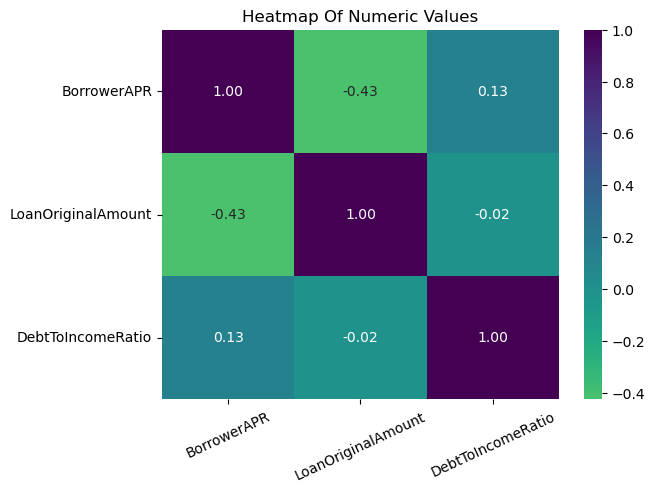

In [86]:
num_var = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio']

sns.heatmap(loan_copy[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 25)
plt.title('Heatmap Of Numeric Values');

There is a negative correlation between loan amount and DebtToincome ratio, a positive correlation between APR and DebtToincome ratio which implied an increase in APR as debt increases.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We can deduce from the scatter plot , that there is a negative correlation between Borrower's APR and Loan Amount. This implies an decrease in Borrower's APr(Interest rate) as loan amount increases.

From the heatmap we conduct at the beginning, we found that the correlation coefficient between the loan amount and APRis -0.43, making moderate negative relationship. The higher the loan, the lower the APR, justifying the deduction from scatter plot above.

The correlation coefficient between the debt-to-income ratio and APR is 0.13, which makes it a weak, positive relationship.

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From the employment vs loan status, it is observed that majority of those employed have an ongoing(current) loan status and most people that are fulltime workers have completed the loan repayment.
Majority of people on 36 and 60 months loan duration have their loan status as current whereas those on 12 months duration have their loan completed.
The number of current loaners are more in all scale of rating.

# Multivariant Visualization

# 13. Borrower APR Vs Terms and Ratings

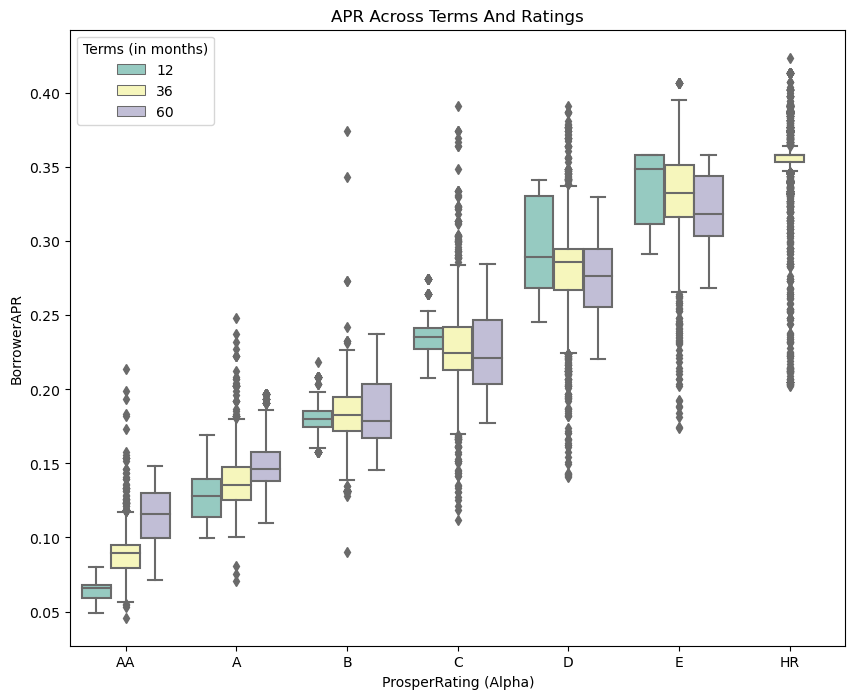

In [87]:
fig = plt.figure(figsize = [10, 8])
ax = sns.boxplot(x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
                 data=loan_copy, palette="Set3")
plt.title('APR Across Terms And Ratings')
plt.legend(title = 'Terms (in months)');

#source code: shorturl.at/hjOQ3

The longer the term, the higher the APR for each individual level except for the rating HR that may not show due to insufficient data,. It is interesting to note the amount of outliers for 12-month terms across all ratings

# 14. What is the effect Of Rating on the Relationship Between APR And Loan Amount

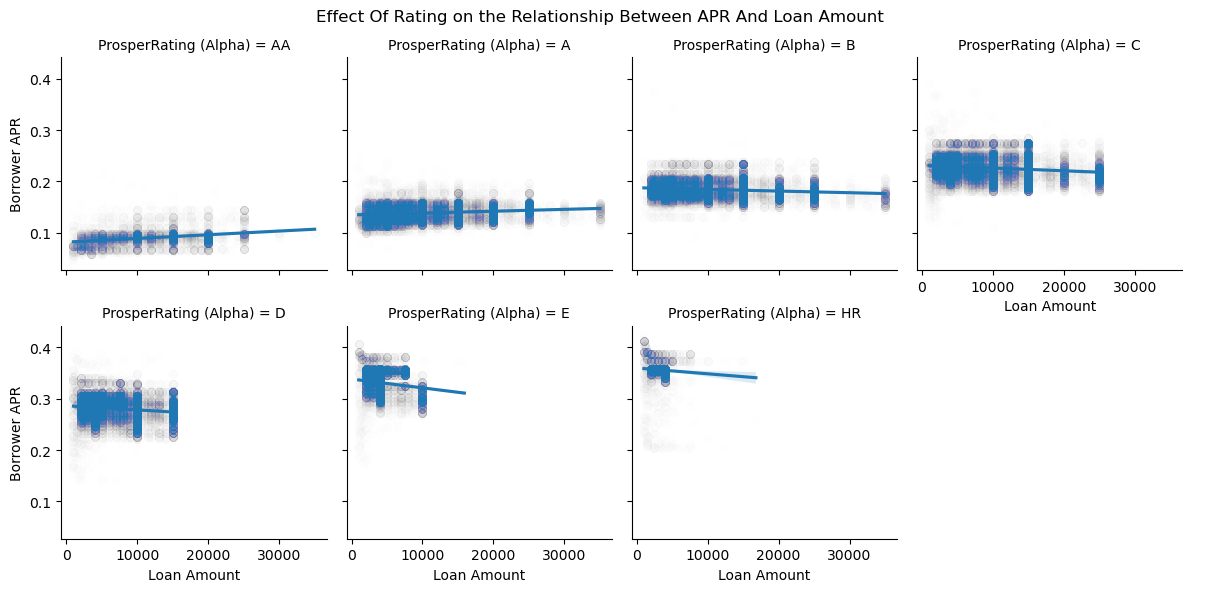

In [88]:
g = sns.FacetGrid(data = loan_copy, col = 'ProsperRating (Alpha)', col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.005})
g.add_legend();
g.set_xlabels('Loan Amount')
g.set_ylabels('Borrower APR')
plt.suptitle('Effect Of Rating on the Relationship Between APR And Loan Amount')
plt.subplots_adjust(top = 0.9);

#source code: https://github.com/Mr-Chang95/Loan_Data_Visualization/blob/main/slide_deck.ipynb

It is observed that individual's rating has some effect on the relationship between the original loan amount and APR. We can see a gradual positive relationship positive as the rating increases.

# 15. how does loan term affect APR in relation to loan Amount

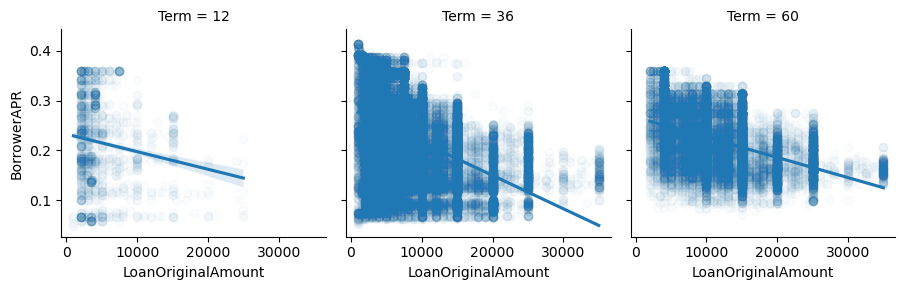

In [89]:
g = sns.FacetGrid(data = loan_copy, col = 'Term', col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.02});

#source code: shorturl.at/hjOQ3

Term doesn't seem to have any effect on the relationship between the loan amount and APR. This just shows that APR decreases with increase in amount despite the duration of the loan.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For Borrower's APR Vs Terms and Ratings plot, The longer the term, the higher the APR for each individual level except for the rating HR that may not show due to insufficient data,. It is interesting to note the amount of outliers for 12-month terms across all ratings

# Were there any interesting or surprising interactions between features?

Its surprising that Term doesn't seem to have any effect on the relationship between the loan amount and APR. The plot (last) just shows that APR decreases with increase in amount despite the loan amount

# Conclusion

The prosperData Dataset was explored using different plotting techniques, i did univariant, Bivariant and Multivariant exploration of the dataset. I made a copy of the dataset with only variables that wound help me answer my numberous questions which mostly revoles around factors that affects the Borrower's ApR (interest rate)